# In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assur- ance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.
Suppose you are the product manager of the factory and you have the test results for some microchips on two di↵erent tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

In [42]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import dot,sum,log
from numpy.linalg import inv
import scipy.optimize as opt 
data = pd.read_csv("ex2data2.txt",header=None,names = ["test1", "test2","outcome"])
X=np.array([data['test1'],data['test2']], dtype=np.float64)
X=np.transpose(X)
(m,n)=X.shape
theta=np.zeros((n+1,1))
y = np.array([data['outcome']], dtype=np.float64).reshape(m,1) 
X.shape

(118, 2)

In [43]:
def sigmoid(z):
        z=1.0/(1+np.exp(-z))
        return z

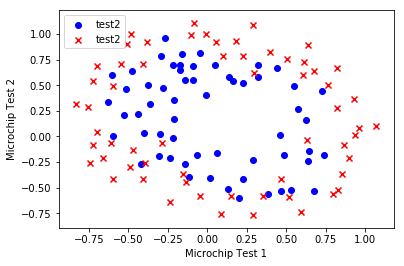

In [44]:
positive = data[data['outcome']==1]
negative = data[data['outcome']==0]
plt.scatter(positive["test1"],positive["test2"], marker='o', color='b')
plt.scatter(negative["test1"],negative["test2"], marker='x', color='r')
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.legend(loc='upper left')

# %% =========== Part 1: Regularized Logistic Regression ============
%  In this part, you are given a dataset with data points that are not
%  linearly separable. However, you would still like to use logistic
%  regression to classify the data points.
%
%  To do so, you introduce more features to use -- in particular, you add
%  polynomial features to our data matrix (similar to polynomial
%  regression).
%

In [45]:
X1=X[:,0].reshape(m,1)
X2=X[:,1].reshape(m,1)
degree=6
out=np.ones((m,1))
out
count=0
for i in range(1,7):
    for j in range(0,i+1):
      o1=np.ones((m,1))  
      count=count+1
      o1 = (np.power(X1 ,(i-j))) * (np.power(X2 ,(j)))   
      out=np.c_[ out, o1 ]  
out.shape 
X=out

In [46]:
out.shape[1]
initial_theta = np.zeros((out.shape[1],1))
initial_theta.shape
l = 1
J=0

initial_theta.shape

(28, 1)

In [101]:
def cf(theta,X,y,l):
         m=len(y)
         h=sigmoid(np.dot(X,theta))
         A=-(y * log(h))
         B=-(1-y)* log(1-h)
         J=np.sum(A+B)/m
         return J
def gd(theta,X,y,l):
         m=len(y)
         X1=X
         grad=np.zeros((28,1))     
         theta1=np.array(theta).reshape(28,1)   
         h1=sigmoid(np.dot(X1,theta1)).reshape(m,1)
         grad=   (np.dot(X1.T,h1-y))/m 
         return grad   
def costFunctionReg(theta,X,y,lamda):
  m=len(y)
  J=0
  grad = np.zeros(initial_theta.shape)
  h=sigmoid(np.dot( X,theta))
  h1=np.sum(-y * np.log(h) - (1-y) * log(1-h))/m
  n=theta.shape[0]
  theta1=theta[1:n-1]
  reg=(lamda/(2.0*m)) * np.sum(np.power(theta1,2))
  J = h1+reg
  #grad= (np.dot(X.T,h-y))/m + (lamda/m) * theta
  #return (J,gd(theta,X,y,l))
  return J

In [102]:
(c,g)=costFunctionReg(initial_theta,X,y,l)
g[0:4]
#cf(initial_theta,X,y,l)
#gd(initial_theta,X,y,l)

TypeError: 'numpy.float64' object is not iterable

In [103]:
test_theta=np.ones(initial_theta.shape)
(c,g)=costFunctionReg(test_theta,X,y,10)
g[0:4]

TypeError: 'numpy.float64' object is not iterable

In [104]:
def fminc(theta,X,y,l):
         return opt.fmin_tnc(func=costFunctionReg, x0=initial_theta, fprime=gd, args=(X,y,l))
     

In [105]:
result=fminc(theta,X,y,1)
theta=result[0].reshape(28,1)

In [106]:
def mapFeature(X1,X2):
    #m=len(X1)
    degree=7
    out=np.ones((1,1))
    out
    count=0
    for i in range(1,degree):
      for j in range(0,i+1):
        o1=np.ones((m,1))  
        count=count+1
        o1 = (np.power(X1 ,(i-j))) * (np.power(X2 ,(j)))   
        out=np.c_[ out, o1 ]  
    return out    

In [156]:
def plotBoundary(theta,X,y,lamda):
  result=fminc(theta,X,y,lamda)
  #print(result[0])
  u = np.linspace(-1, 1.5, 50)
  v = np.linspace(-1, 1.5, 50)
  z = np.zeros((len(u), len(v)))
  for i in range(len(u)):
      for j in range(len(v)):
          z[i,j] = (np.dot(mapFeature(np.array([u[i]]), np.array([v[j]])),result[0]))
          #print(z[i,j])  
  u1, v1 = np.meshgrid( u, v )      
  plt.contour(u, v, z.T,[]) 

In [157]:
def predict(theta, X):  
    #X=X.reshape(118,1)
    theta=theta.reshape(28,1)
    probability = sigmoid(np.dot(X , theta))
    return [1 if x >= 0.5 else 0 for x in probability]


In [158]:
predictions =predict(result[0],X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]  
accuracy = sum(correct) % len(correct)
count=0
for cnt in predictions:
    if cnt:
      count=count+1
    
count/len(correct)  


0.5084745762711864

In [159]:
t=np.zeros((28,1))

ValueError: zero-size array to reduction operation minimum which has no identity

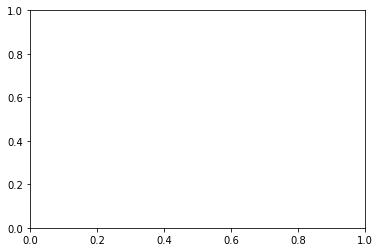

In [161]:
plotBoundary(t,X,y,12)